# Kmom03 MA1477 Matmod


# Uppgift 1: Konfidensintervall

När man beräknar medelvärden av en stor datamängd utifrån *stickprov* så beror medelvärdet såklart på vilken data som ingår i stickprovet. Ett sätt tackla detta problem är att ange ett intervall som innehåller det sökta medelvärdet, med en viss sannolikhet. Några (påhittade) exempel

1. Livslängden för en viss bil ligger mellan 12 och 15 år med sannolikheten 0.95
2. Antalet studenter som söker till BTH per är mellan 1500 och 2000 med sannolikhet 0.8
3. Henrik sover mellan 5 och 6 timmar per natt med sannolikhet 0.95

Intervallen i exemplen ovan kallas *konfidensintervall* och är ett mått på den osäkerhet slumpen bidrar med när vi försöker skatta den bakomliggande populationens medelvärde.

Från Kmom02 känner vi till att det gäller att om man adderar ett stort antal oberoende slumpmässiga variabler så kommer summan gå mot en normalfördelning (centrala gränsvärdessatsen). Vi utgår därför från en normalfördelad variabel med väntevärdet $\mu$ och standardavvikelsen $\sigma$.

För ett stickprov med $n$ observationer så gäller det att stickprovets medelvärde
$$
\bar{X} = \frac{1}{n}\sum x_i
$$
är normalfördelat med väntevärde $\mu$ och standardavvikelse $\sigma/\sqrt{n}$. 

Då gäller det att 
$$
\Pr\left( \bar{X} -1.96 \cdot \frac{\sigma}{\sqrt{n}} < \mu <  \bar{X}  +1.96 \cdot \frac{\sigma}{\sqrt{n}} \right) = 0.95
$$
och 
$$
\Pr\left( \bar{X} -2.58 \cdot \frac{\sigma}{\sqrt{n}} < \mu <  \bar{X}  +2.58 \cdot \frac{\sigma}{\sqrt{n}} \right) = 0.99
$$
dvs väntevärdet $\mu$ ligger i intervallet 

$$
\left(\bar{X} -1.96 \cdot \frac{\sigma}{\sqrt{n}}, \bar{X} +1.96 \cdot \frac{\sigma}{\sqrt{n}} \right)\text{ med sannolikheten 95%}
$$
och
$$
\left(\bar{X} -2.58 \cdot \frac{\sigma}{\sqrt{n}}, \bar{X} +2.58 \cdot \frac{\sigma}{\sqrt{n}} \right) \text{ med sannolikheten 99%}
$$



I detta kursmoment ska vi beräkna konfidensintervall för responstiden för `ping`-tider. Kommandot `ping` används t.ex. för att undersöka ifall en värddator är åtkomligt via nätverket och för att mäta hur lång tid det tar att skicka datapaket till värdatorn.

Följande `python`-kod pingar adressen `www.bth.se` 20 gånger. Sist i ouputen finns `time` ger anger tiden för hur lång tid det tar att skicka ett datapaket till de angivna värddatorn.


In [1]:
import subprocess
hostname = "www.bth.se"

response = subprocess.check_output(
        ['ping', '-c', '20', hostname],
        stderr=subprocess.STDOUT,  # get all output
        universal_newlines=True  # return string not bytes
    )

print(response)

PING www.bth.se (213.52.129.125): 56 data bytes
64 bytes from 213.52.129.125: icmp_seq=0 ttl=50 time=24.820 ms
64 bytes from 213.52.129.125: icmp_seq=1 ttl=50 time=25.572 ms
64 bytes from 213.52.129.125: icmp_seq=2 ttl=50 time=25.517 ms
64 bytes from 213.52.129.125: icmp_seq=3 ttl=50 time=25.631 ms
64 bytes from 213.52.129.125: icmp_seq=4 ttl=50 time=26.411 ms
64 bytes from 213.52.129.125: icmp_seq=5 ttl=50 time=25.493 ms
64 bytes from 213.52.129.125: icmp_seq=6 ttl=50 time=26.559 ms
64 bytes from 213.52.129.125: icmp_seq=7 ttl=50 time=24.767 ms
64 bytes from 213.52.129.125: icmp_seq=8 ttl=50 time=25.627 ms
64 bytes from 213.52.129.125: icmp_seq=9 ttl=50 time=25.891 ms
64 bytes from 213.52.129.125: icmp_seq=10 ttl=50 time=24.829 ms
64 bytes from 213.52.129.125: icmp_seq=11 ttl=50 time=26.439 ms
64 bytes from 213.52.129.125: icmp_seq=12 ttl=50 time=25.546 ms
64 bytes from 213.52.129.125: icmp_seq=13 ttl=50 time=25.615 ms
64 bytes from 213.52.129.125: icmp_seq=14 ttl=50 time=24.927 ms
64

## Uppgifter

Ni ska skapa en sida i valfritt språk där följande ska ingå.

1. Välj en sida som ni ska pinga.
2. Beräkna och presentera konfidensintervallen för 95% respektive 99% för olika värden på $n > 30$.
3. Då $n$ ökar så blir konfidensintevallet mindre. Vad är väntevärdet $\mu$ för pingtiden för den sida ni valt att pinga?

## Extrauppgifter om sidan kan köras dynamiskt
1. Låt användaren mata in sida som hen vill pinga.
2. Låt användaren mata in förväntad ping tid och beräkna konfidensintervall och se ifall värdet befinner sig inom konfidensintervallet.

Se **Exempel 1, sid 163** i Statistisk datanalys för att beräkna konfidensintervallen när man känner till $\sigma$, $n$ och $\bar{X}$.

# Uppgift 2: Pearsons korrelationskoefficient

I denna uppgift ska vi studera hur två variabler $X,Y$ är korrelerade, dvs om det finns något samband mellan $X$ och $Y$. Exempel

- Är antalet studieår korrelerat med lön?
- Finns det något samband mellan antal rökta cigaretter och lungcancer?

Talet 
$$
\rho = \dfrac{\sum (x_i - \bar{x})(y_i - \bar{y})}{ \sqrt{\sum (x_i - \bar{x})^2 \sum (y_i -\bar{y})^2 }}
$$

kallas *Pearsons korrelationskoefficient* och beskriver sambandet mellan $X$ och $Y$.
Man kan visa att $-1 \leq \rho \leq 1$. För $\rho$ gäller följande

- Positiv korrelation: $\rho > 0$ (samverkande faktorer)
- Negativ korrelation: $\rho < 0$ (motverkande faktorer)
- Okorrelerat samband: $\rho = 0$

I exemplet nedan hur kan visualisera två variabler $x,y$ i en `scatterplot`. Här svara `x[i]`mot `y[i]`. Exempel är att datan motsvarar att man ha frågat 8 personer hur många år de haft sitt jobb och vad de har i lön.

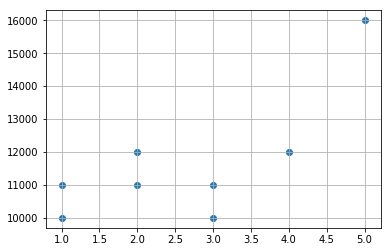

In [66]:
import matplotlib.pyplot as plt

x = [1,1,2,2,3,3,4,5]
y = [10000,11000,12000,11000,11000,10000,12000,16000]

plt.scatter(x,y)
plt.grid(True)
plt.show()

## Uppgifter


1. Hitta en studie, datamängd eller liknande involverande två variabler som ni vill analysera korrelationen för.
2. Gör en scatterplot över datan.
3. Beräkna Peasons korrelationskoefficient och avgör ifall variablerna har något samband.